# Falling Apples

Solution for https://github.com/DecodedCo/data-in-a-day/blob/python/data-in-a-day.ipynb

## Retrieving and installing libraries


In [2]:
!pip install pandas #spreadsheets in python...
!pip install sklearn #machine learning algorithms library
!pip install numpy #array mathematics
!pip install matplotlib #graphing library

# Importing libraries

### and inlining images to the document

In [3]:
import matplotlib
import pandas as pd
from sklearn import linear_model
%matplotlib inline

## Source the data

### From 
https://newton-decoded.firebaseio.com/falls.json

In [4]:
df = pd.read_json("https://newton-decoded.firebaseio.com/falls.json",orient="index")

In [5]:
df.head()

,x,y
-LOP0esKHH4sg2pJxteJ,1.98,0.09
-LOP0fQg7WW4SSIzqeJO,0.82,0.16
-LOP0fwNnWWWZpLh7kDq,1.03,0.16
-LOP0gQI4pOKAQGp_dAk,0.88,0.16
-LOP0gtnYTOXs0H9Aneh,2.13,0.16


In [13]:
df.rename(columns={'x': 'height', 'y': 'time^2'}, inplace=True)
df.describe()

,height,time^2
count,12.000000,12.000000
mean,1.718333,0.085000
std,0.719341,0.062885
min,0.820000,0.010000
25%,1.022500,0.032500
50%,1.790000,0.090000
75%,2.357500,0.160000
max,2.680000,0.160000


## Plot the data

3.0.0 /srv/conda/lib/python3.6/site-packages/matplotlib/__init__.py


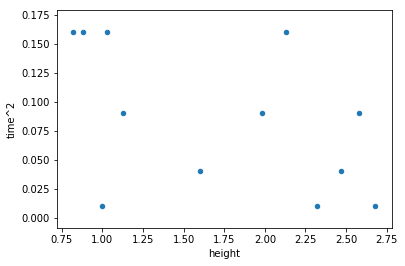

In [14]:
#!pip install matplotlib #graphing library
#import matplotlib
print(matplotlib.__version__, matplotlib.__file__)
df.plot.scatter(x='height', y='time^2')

## Build a model based on the data

### linear regression

In [15]:
model = linear_model.LinearRegression()
model.fit(df[['height']],df[['time^2']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
## Evaluate model

In [17]:
df['prediction'] = model.predict(df[['height']])
df.head()

,height,time^2,prediction
-LOP0esKHH4sg2pJxteJ,1.98,0.09,0.073958
-LOP0fQg7WW4SSIzqeJO,0.82,0.16,0.122910
-LOP0fwNnWWWZpLh7kDq,1.03,0.16,0.114048
-LOP0gQI4pOKAQGp_dAk,0.88,0.16,0.120378
-LOP0gtnYTOXs0H9Aneh,2.13,0.16,0.067628


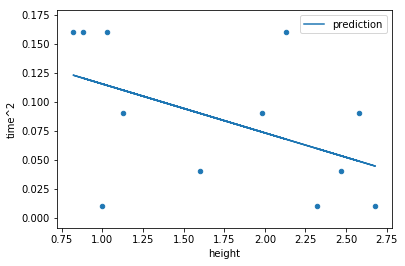

In [21]:
scatter = df.plot.scatter(x='height', y='time^2')
df.plot(x='height', y='prediction', ax=scatter)

In [22]:
model.score(df[['height']],df[['time^2']])

0.23302064555187774